# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [59]:
data = pd.read_csv("https://raw.githubusercontent.com/ekaprmdtya13/Machine_Learning_Dicoding/refs/heads/main/Dataset/data_clustering.csv")
df = pd.DataFrame(data)
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Cluster
0,1,1,19,15000,39,5,1,4,2
1,2,1,21,35000,81,2,3,3,2
2,3,0,20,86000,6,2,1,1,0
3,4,0,23,59000,77,7,0,2,2
4,5,0,31,38000,40,3,2,6,2


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [60]:
X = data.drop(columns=['Cluster'])
y = data['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [61]:
nb = GaussianNB().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
print(nb.score(X_train , y_train))
print(svm.score(X_train , y_train))

0.97375
0.995


Algoritma klasifikasi yang digunakan adalah Naive Bayes dan Support Vector Machine karena Naive Bayes memiliki kelebihan dalam menangani data dengan banyak fitur dan membuat model yang cepat serta efisien. Kemudian Support Vector Machine juga memiliki Kemampuan Menangani Data Non-Linier.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

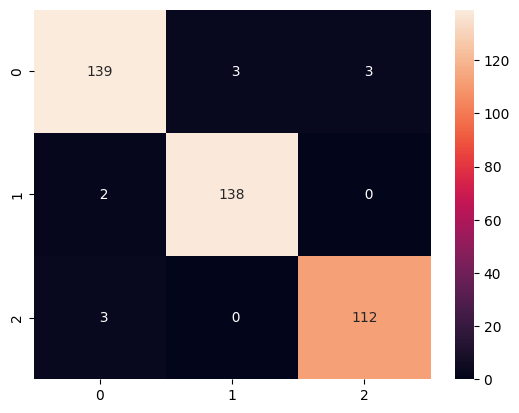

In [62]:
nb_pred = nb.predict(X_test)
nb_cm = confusion_matrix(y_test , nb_pred)
sns.heatmap(nb_cm, annot=True,fmt='3g')
plt.show()

In [65]:
Accuracy = accuracy_score(y_test , nb_pred)
print(Accuracy)

0.9725


In [66]:
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       145
           1       0.98      0.99      0.98       140
           2       0.97      0.97      0.97       115

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



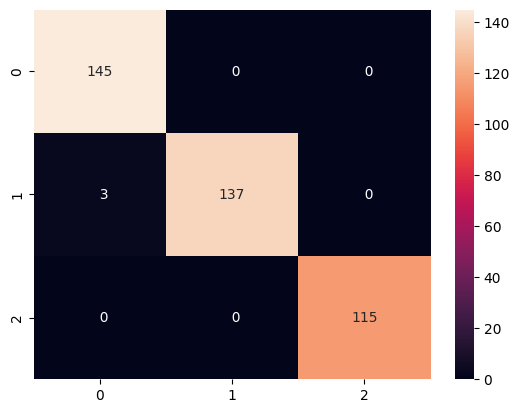

In [67]:
svm_pred = svm.predict(X_test)
svm_cm = confusion_matrix(y_test , svm_pred)
sns.heatmap(svm_cm, annot=True,fmt='3g')
plt.show()

In [68]:
Accuracy = accuracy_score(y_test , svm_pred)
print(Accuracy)

0.9925


In [69]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       145
           1       1.00      0.98      0.99       140
           2       1.00      1.00      1.00       115

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



- Support Vector Machine (SVM) menunjukkan performa yang lebih baik secara keseluruhan dibandingkan Naive Bayes, baik dalam hal akurasi, precision, recall, maupun F1-score.
- SVM lebih andal dalam menangani dataset yang memiliki distribusi kelas yang relatif seimbang, sebagaimana terlihat dari angka precision, recall, dan F1-score yang hampir sempurna untuk semua kelas.
- Naive Bayes masih merupakan model yang baik, dengan akurasi yang cukup tinggi (97%). Namun, model ini sedikit kurang optimal dibandingkan SVM, terutama pada kelas-kelas tertentu, seperti terlihat dari nilai recall dan precision yang sedikit lebih rendah.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

**Rekomendasi**
- Jika tujuan utama adalah mendapatkan performa terbaik tanpa mempertimbangkan faktor seperti waktu komputasi, maka SVM merupakan pilihan yang lebih baik.
- Namun, jika efisiensi komputasi menjadi pertimbangan utama (misalnya, pada dataset besar atau real-time prediction), Naive Bayes dapat menjadi alternatif yang layak karena biasanya memiliki waktu pelatihan yang lebih cepat dibandingkan SVM.